<a href="https://colab.research.google.com/github/Knowsoeun/AI_Study/blob/main/%EC%9D%98%EB%A5%98%EC%A7%81%EB%AC%BC_%EB%B6%88%EB%9F%89%EA%B2%80%EC%B6%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

실습 환경 준비

In [ ]:
!pip install opencv-python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2     #컴퓨터 비전 오픈소스 라이브러리
import os
import glob
import shutil
import random
import string
import numpy as np

In [ ]:
PATH_DEFECT = '/content/drive/MyDrive/AI스터디/dataset/Defect_images/Defect_images/'
PATH_MASK = '/content/drive/MyDrive/AI스터디/dataset/Mask_images/Mask_images/'
PATH_NODEFECT = '/content/drive/MyDrive/AI스터디/dataset/NODefect_images/NODefect_images/'

Dataset 불러오기

In [ ]:
random.seed(0)

defect_list = glob.glob(PATH_DEFECT + '*.png')
mask_list = glob.glob(PATH_MASK + '*.png')
pass_list = glob.glob(PATH_NODEFECT + '**/*.png')

# Match defect-mask pairs
new_defect_list = list()
new_mask_list = list()
for defect in defect_list:
    num = defect.split('/')[-1].split('_')[0]
    for mask in mask_list:
        num_mask = mask.split('/')[-1].split('_')[0]
        if num == num_mask:
            new_defect_list.append(defect)
            new_mask_list.append(mask)
            break
defect_list = new_defect_list
mask_list = new_mask_list

첫 발송 데이터 생성

In [ ]:
# The first dataset given
if os.path.exists('/content/drive/MyDrive/AI스터디/dataset/1') is False:
    os.mkdir('/content/drive/MyDrive/AI스터디/dataset/1')
for file_name in pass_list + defect_list:
    if random.randint(0, 9) < 2:
        barcode = ''.join(random.choices(string.ascii_letters + string.digits, k=16))
        shutil.copy2(file_name, '/content/drive/MyDrive/AI스터디/dataset/1/' + barcode + '.png')

두번째 데이터 생성

In [ ]:
# The second dataset
if os.path.exists('/content/drive/MyDrive/AI스터디/dataset/2') is False:
    os.mkdir('/content/drive/MyDrive/AI스터디/dataset/2')
if os.path.exists('/content/drive/MyDrive/AI스터디/dataset/2/OK') is False:
    os.mkdir('/content/drive/MyDrive/AI스터디/dataset/2/OK')
if os.path.exists('/content/drive/MyDrive/AI스터디/dataset/2/FAIL') is False:
    os.mkdir('/content/drive/MyDrive/AI스터디/dataset/2/FAIL')
idx = 0
for file_name in pass_list:
    img = cv2.imread(file_name)
    height, width, _ = img.shape
    step = height // 2

    for i in range(width // step):
        w = i * step
        if w < width - height and random.randint(0, 9) < 2:
            patch = img[:, w:w+height, :]
            cv2.imwrite('/content/drive/MyDrive/AI스터디/dataset/2/OK/%04d.png' % idx, patch)
            idx += 1 

patch_list = list()
for item in zip(defect_list, mask_list):
    defect, mask = item

    img_d = cv2.imread(defect)
    img_m = cv2.imread(mask)

    height, width, _ = img_d.shape
    step = height // 2
    for i in range(width // step):
        w = i * step
        if w < width - height:
            patch = img_d[:, w:w+height, :]
            patch_d = img_m[:, w:w+height, :]
            if patch_d.sum() > 0:
                patch_list.append(patch)

random.shuffle(patch_list)
patch_list_fraction = patch_list[:len(patch_list)//3]
for idx, patch in enumerate(patch_list_fraction):
    cv2.imwrite('/content/drive/MyDrive/AI스터디/dataset/2/FAIL/%04d.png' % idx, patch)

세번째 데이터 생성

In [ ]:
# The third dataset
if os.path.exists('/content/drive/MyDrive/AI스터디/dataset/3') is False:
    os.mkdir('/content/drive/MyDrive/AI스터디/dataset/3')
if os.path.exists('/content/drive/MyDrive/AI스터디/dataset/3/OK') is False:
    os.mkdir('/content/drive/MyDrive/AI스터디/dataset/3/OK')
if os.path.exists('/content/drive/MyDrive/AI스터디/dataset/3/FAIL') is False:
    os.mkdir('/content/drive/MyDrive/AI스터디/dataset/3/FAIL')
if os.path.exists('/content/drive/MyDrive/AI스터디/dataset/3/MASK') is False:
    os.mkdir('/content/drive/MyDrive/AI스터디/dataset/3/MASK')
idx = 0
for file_name in pass_list:
    img = cv2.imread(file_name)
    height, width, _ = img.shape
    step = height // 2

    for i in range(width // step):
        w = i * step
        if w < width - height and random.randint(0, 9) < 3:
            patch = img[:, w:w+height, :]
            cv2.imwrite('/content/drive/MyDrive/AI스터디/dataset/3/OK/%04d.png' % idx, patch)
            idx += 1 

patch_pair_list = list()
for item in zip(defect_list, mask_list):
    defect, mask = item

    img_d = cv2.imread(defect)
    img_m = cv2.imread(mask)

    height, width, _ = img_d.shape
    step = height // 2
    for i in range(width // step):
        w = i * step
        if w < width - height:
            patch = img_d[:, w:w+height, :]
            patch_d = img_m[:, w:w+height, :]

            if patch_d.sum() > 0:
                patch_pair_list.append((patch, patch_d))

random.shuffle(patch_pair_list)
for idx, pair in enumerate(patch_pair_list):
    patch, patch_d = pair
    cv2.imwrite('/content/drive/MyDrive/AI스터디/dataset/3/FAIL/%04d.png' % idx, patch)
    cv2.imwrite('/content/drive/MyDrive/AI스터디/dataset/3/MASK/%04d.png' % idx, patch_d)

실전 데이터 생성

In [ ]:
# The test dataset
if os.path.exists('/content/drive/MyDrive/AI스터디/data/') is False:
    os.mkdir('/content/drive/MyDrive/AI스터디/data/')
if os.path.exists('/content/drive/MyDrive/AI스터디/tfrecords/') is False:
    os.mkdir('/content/drive/MyDrive/AI스터디/tfrecords/')
if os.path.exists('/content/drive/MyDrive/AI스터디/model/') is False:
    os.mkdir('/content/drive/MyDrive/AI스터디/model/')
if os.path.exists('/content/drive/MyDrive/AI스터디/data/input_data') is False:
    os.mkdir('/content/drive/MyDrive/AI스터디/data/input_data')
if os.path.exists('/content/drive/MyDrive/AI스터디/data/output_csv') is False:
    os.mkdir('/content/drive/MyDrive/AI스터디/data/output_csv')
    
idx = 0
for file_name in pass_list:
    img = cv2.imread(file_name)
    height, width, _ = img.shape
    step = height // 2

    for i in range(width // step):
        w = i * step
        if w < width - height and random.randint(0, 9) < 5:
            patch = img[:, w:w+height, :]
            cv2.imwrite('/content/drive/MyDrive/AI스터디/data/input_data/ok_%04d.png' % idx, patch)
            idx += 1 

patch_pair_list = list()
for item in zip(defect_list, mask_list):
    defect, mask = item

    img_d = cv2.imread(defect)
    img_m = cv2.imread(mask)

    height, width, _ = img_d.shape
    step = height // 2
    for i in range(width // step):
        w = i * step
        if w < width - height:
            patch = img_d[:, w:w+height, :]
            patch_d = img_m[:, w:w+height, :]

            if patch_d.sum() > 0:
                patch_pair_list.append((patch, patch_d))

random.shuffle(patch_pair_list)
for idx, pair in enumerate(patch_pair_list):
    patch, patch_d = pair
    cv2.imwrite('/content/drive/MyDrive/AI스터디/data/input_data/fail_%04d.png' % idx, patch)

실행 가능성 확인하기

In [ ]:
import glob
import os
import tensorflow as tf
import cv2
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential

하이퍼파라미터

In [97]:
EPOCHS = 15  # 학습이 너무 느려서 15로 설정함

DATASET_PATH = '/content/drive/MyDrive/AI스터디/dataset/2/'
DATASET_OK_PATTERN = DATASET_PATH + 'OK/*.png'     # 정상
DATASET_FAIL_PATTERN = DATASET_PATH + 'FAIL/*.png'  # 불량

RESULT_SAVE_PATH = '/content/drive/MyDrive/AI스터디/results/'  # 알고리즘 결과

단순한 모델 설정

In [ ]:
def Model():
    return Sequential([Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)), #tensorflow 버전업으로 코드 변경
                       MaxPool2D(),
                       Conv2D(64, (3, 3), activation='relu'),
                       MaxPool2D(),
                       Conv2D(128, (3, 3), activation='relu'),
                       MaxPool2D(),
                       Conv2D(256, (3, 3), activation='relu'),
                       MaxPool2D(),
                       Flatten(),
                       Dense(1, activation='sigmoid')])

데이터셋 불러오기

In [ ]:
def preprocess(file_name):
    img = tf.io.read_file(file_name)
    img = tf.image.decode_png(img, channels=1) #tensorflow 버전업으로 코드 변경
    return tf.image.convert_image_dtype(img, tf.float32)

In [ ]:
ok_list = glob.glob(DATASET_OK_PATTERN)
ds_ok = tf.data.Dataset.list_files(ok_list)
ds_ok_label = tf.data.Dataset.from_tensor_slices([0] * len(ok_list))

ds_ok = ds_ok.map(preprocess)
ds_ok = tf.data.Dataset.zip((ds_ok, ds_ok_label))

fail_list = glob.glob(DATASET_FAIL_PATTERN)
ds_fail = tf.data.Dataset.list_files(fail_list)
ds_fail_label = tf.data.Dataset.from_tensor_slices([1] * len(fail_list))

ds_fail = ds_fail.map(preprocess)
ds_fail = tf.data.Dataset.zip((ds_fail, ds_fail_label))

ds = tf.data.Dataset.concatenate(ds_ok, ds_fail)

Train, Valid 데이터셋 나누기

In [ ]:
ds_size = len(ok_list) + len(fail_list)
train_size = int(ds_size * 0.7)

ds = ds.shuffle(ds_size)
ds_train = ds.take(train_size).shuffle(1024, reshuffle_each_iteration=True).batch(32)
ds_valid = ds.skip(train_size).batch(32)

모델 생성 및 학습

In [94]:
model = Model()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [98]:
model.fit(ds_train, validation_data=ds_valid, epochs=EPOCHS)
# Training 시키니 loss가 0.45에서 0.36으로 지속적으로 감소하였다.

Epoch 1/15
21/21 [==============================] - 107s 5s/step - loss: 0.3403 - accuracy: 0.8805 - val_loss: 0.3178 - val_accuracy: 0.8908
Epoch 2/15
21/21 [==============================] - 106s 5s/step - loss: 0.3766 - accuracy: 0.8638 - val_loss: 0.3460 - val_accuracy: 0.8627
Epoch 3/15
21/21 [==============================] - 106s 5s/step - loss: 0.3371 - accuracy: 0.8865 - val_loss: 0.4077 - val_accuracy: 0.9049
Epoch 4/15
21/21 [==============================] - 107s 5s/step - loss: 0.3422 - accuracy: 0.8911 - val_loss: 0.3291 - val_accuracy: 0.8979
Epoch 5/15
21/21 [==============================] - 106s 5s/step - loss: 0.3354 - accuracy: 0.8654 - val_loss: 0.3893 - val_accuracy: 0.8732
Epoch 6/15
21/21 [==============================] - 107s 5s/step - loss: 0.3151 - accuracy: 0.8971 - val_loss: 0.2713 - val_accuracy: 0.9155
Epoch 7/15
21/21 [==============================] - 106s 5s/step - loss: 0.3017 - accuracy: 0.8926 - val_loss: 0.2986 - val_accuracy: 0.8768
Epoch 8/15
21

결과를 이미지로 저장

In [100]:
def mkdir(path):
    if os.path.exists(path) is False:
        os.mkdir(path)

mkdir(RESULT_SAVE_PATH)
mkdir(RESULT_SAVE_PATH + '/TP')  # True Positive
mkdir(RESULT_SAVE_PATH + '/TN')  # True Negative
mkdir(RESULT_SAVE_PATH + '/FP')  # False Positive 
mkdir(RESULT_SAVE_PATH + '/FN')  # False Negative 

index = 0
for imgs, labels in ds_valid:
    preds = model.predict(imgs)
    for idx in range(imgs.shape[0]):
        gt = labels[idx].numpy()
        y = preds[idx]
        
        if gt == 1 and y > 0.5:
            path = RESULT_SAVE_PATH + '/TP' # 제대로 검출한 것들(불량 검출)-1에 가까워야 잘 검출된 것이다.
        elif gt == 1 and y <= 0.5:
            path = RESULT_SAVE_PATH + '/FN' # 양품이라고 했는데 실제로 불량이었던 것들. 오검. 
        elif gt == 0 and y > 0.5:
            path = RESULT_SAVE_PATH + '/FP' # 0이므로 오검한 것은 없다.
        else:
            path = RESULT_SAVE_PATH + '/TN' # 0.5에 가깝게 점수가 높은 것들을 보면 복잡하게 생긴 것들이 많다. 
                                            # 0.4점대랑 0.1점대랑 구분이 명확하게 되진 않았다.
            
        cv2.imwrite(path + '/%.4f_%04d.png' % (y, index), imgs[idx].numpy() * 255)
        index +=1
# 결과 이미지가 저장된 곳을 찾아가서 정밀도와 재현율을 구해보았다.
# TP = 2, FN= 33, FP= 0, TN=249
# 정밀도 = 1, 재현율 = 0.06

 *정밀도*  
 2/(2 + 0) = 1  
 이를 해석해보자면, ‘불량으로 판정한 양품은 2개인데, 그 중 2명만 실제로 불량인 양품이다’라고 이해할 수 있다.   
 따라서, 정밀도 측면에서 이 진단 키트의 정확성은 100%라고 볼 수 있다.

 

*재현율*  

(positive 데이터를 negative로 잘못 판단하면 문제가 생기는 경우에 중요시된다.)  
(재현율은 예를 들어 암 발병을 판단하는 경우에 암 환자를 음성으로 잘못 판단하는 경우 대가가 크기 때문에 FN을 낮추는데 초점을 맞춰야한다.)  
2/(33+0)=0.06    
재현율이 1% 미만이므로 좋은 모델이라고 볼 수 있다. 

TFRecord Builder

In [104]:
import glob
import os
import tensorflow as tf
import cv2

Paths and Hyperparameters

In [109]:
DATASET_OK_PATTERN = '/content/drive/MyDrive/AI스터디/dataset/3/OK/*.png'
DATASET_FAIL_PATTERN = '/content/drive/MyDrive/AI스터디/dataset/3/FAIL/*.png'

TFRECORD_PATH = '/content/drive/MyDrive/AI스터디/tfrecords/'
IMAGE_PER_TFRECORD = 100

Import data

In [110]:
ok_list = glob.glob(DATASET_OK_PATTERN)
fail_list = glob.glob(DATASET_FAIL_PATTERN)

num_ok = len(ok_list)
num_fail = len(fail_list)

# Oversampling
fail_list_new = list()
for _ in range(num_ok // num_fail):
    fail_list_new += fail_list
fail_list_new += fail_list[: num_ok % num_fail]
fail_list = fail_list_new

ok_label = [0] * len(ok_list)
fail_label = [1] * len(fail_list)

file_list = ok_list + fail_list
label_list = ok_label + fail_label

TFRecord functions

In [111]:
def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def image_example(image_string, label):
    image_shape = tf.image.decode_image(image_string).shape

    feature = {
        'height': _int64_feature(image_shape[0]),
        'width': _int64_feature(image_shape[1]),
        'depth': _int64_feature(image_shape[2]),
        'label': _int64_feature(label),
        'image_raw': _bytes_feature(image_string),
    }

    return tf.train.Example(features=tf.train.Features(feature=feature))

Write TFRecords

In [112]:
if os.path.exists(TFRECORD_PATH) is False:
    os.mkdir(TFRECORD_PATH)

num_tfrecords = len(file_list) // IMAGE_PER_TFRECORD
if len(file_list) % IMAGE_PER_TFRECORD != 0:
    num_tfrecords += 1

for idx in range(num_tfrecords):
    idx0 = idx * IMAGE_PER_TFRECORD
    idx1 = idx0 + IMAGE_PER_TFRECORD
    record_file = TFRECORD_PATH + '%05d.tfrecords' % idx
    with tf.io.TFRecordWriter(record_file) as writer:
        for filename, label in zip(file_list[idx0:idx1],
                                   label_list[idx0:idx1]): # 데이터를 원하는 크기만큼 슬라이싱해서 넣어준다.
            image_string = open(filename, 'rb').read()
            tf_example = image_example(image_string, label)
            writer.write(tf_example.SerializeToString())

-모델 학습 및 검증하기

모델 학습

In [124]:
pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.5 MB/s 


In [125]:
import glob
import os
import tensorflow as tf
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.layers import Conv2D, MaxPool2D, Concatenate, Flatten, Dense

하이퍼파라미터

In [139]:
EPOCHS = 2 # 너무 오래걸려서 일단 1000대신 2번만 돌린다
RESULT_SAVE_PATH = '/content/drive/MyDrive/AI스터디/results/'

Inception-based 모델 정의

In [127]:
def Model():
    def inception(filters):
        def subnetwork(x):
            h1 = Conv2D(filters, (1, 1), padding='same', activation='relu')(x)
            h1 = MaxPool2D()(h1)
            
            h2 = Conv2D(filters // 2, (1, 1), padding='same', activation='relu')(x)
            h2 = Conv2D(filters, (3, 3), padding='same', activation='relu')(h2)
            h2 = MaxPool2D()(h2)
            
            h3 = Conv2D(filters // 2, (1, 1), padding='same', activation='relu')(x)
            h3 = Conv2D(filters, (5, 5), padding='same', activation='relu')(h3)
            h3 = MaxPool2D()(h3)
            return Concatenate()([h1, h2, h3])
        return subnetwork
    
    x = tf.keras.Input(shape=(256, 256, 3))
    h = inception(16)(x)
    h = inception(32)(h)
    h = inception(32)(h)
    h = inception(32)(h)
    h = inception(32)(h)
    h = Flatten()(h)
    h = Dense(1024, activation='relu')(h)
    y = Dense(1, activation='sigmoid')(h)
    return tf.keras.Model(inputs=x, outputs=y)

Data 전처리 함수 정의

In [128]:
def preprocess(img):
    return tf.image.convert_image_dtype(img, tf.float32)

Data Augmentation 함수 정의

In [129]:
def augmentation(img, label):
    def flip(x):
        x = tf.image.random_flip_left_right(x)
        x = tf.image.random_flip_up_down(x)
        return x
    
    def rotate(x):
        x = tf.cond(tf.random.uniform(shape=[], minval=0.0, maxval=1.0, dtype=tf.float32) > 0.5,
                   lambda: tfa.image.rotate(x,
                                       tf.random.uniform(shape=[], minval=0.0, maxval=360.0, dtype=tf.float32),
                                       interpolation='BILINEAR'),
                   lambda: x)
        return x
    
    def translation(x):
        dx = tf.random.uniform(shape=[], minval=-10.0, maxval=10.0, dtype=tf.float32)
        dy = tf.random.uniform(shape=[], minval=-10.0, maxval=10.0, dtype=tf.float32)
        x = tf.cond(tf.random.uniform(shape=[], minval=0.0, maxval=1.0, dtype=tf.float32) > 0.5,
                    lambda: tfa.image.transform(x,
                                                [0, 0, dx, 0, 0, dy, 0, 0],
                                                interpolation='BILINEAR'),
                    lambda: x)
        return x
    
    img = flip(img)
    img = rotate(img)
    img = translation(img)
           
    return img, label

TFRecords 불러오기

In [132]:
tffiles = glob.glob('/content/drive/MyDrive/AI스터디/tfrecords/*')
raw_image_dataset = tf.data.TFRecordDataset(tffiles)

image_feature_description = {
    'height': tf.io.FixedLenFeature([], tf.int64),
    'width': tf.io.FixedLenFeature([], tf.int64),
    'depth': tf.io.FixedLenFeature([], tf.int64),
    'label': tf.io.FixedLenFeature([], tf.int64),
    'image_raw': tf.io.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):
    return tf.io.parse_single_example(example_proto, image_feature_description)

def _parse_image_label(parsed_dataset):
    return preprocess(tf.image.decode_png(parsed_dataset['image_raw'])), parsed_dataset['label']

parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
dataset = parsed_image_dataset.map(_parse_image_label)

데이터셋 나누기

In [134]:
ds_size = 0
for _ in dataset:
    ds_size += 1

train_size = int(ds_size * 0.7)

ds = dataset.shuffle(ds_size)
ds_train = ds.take(train_size).shuffle(1024, reshuffle_each_iteration=True).prefetch(1024).batch(32).map(augmentation)
ds_valid = ds.skip(train_size).prefetch(1024).batch(32)

모델 생성

In [135]:
model = Model()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

모델 학습하기

In [140]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=1)
history = model.fit(ds_train,
                    validation_data=ds_valid,
                    epochs=EPOCHS,
                    callbacks=[earlystopping])

Epoch 1/2
55/55 [==============================] - 546s 10s/step - loss: 0.6928 - accuracy: 0.4925 - val_loss: 0.6883 - val_accuracy: 0.5027
Epoch 2/2
55/55 [==============================] - 512s 9s/step - loss: 0.6705 - accuracy: 0.5743 - val_loss: 0.6503 - val_accuracy: 0.6694


학습 결과 Plot

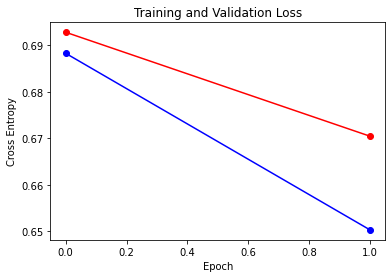

In [141]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-')
plt.plot(val_loss, 'bo-')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

모델 저장

In [142]:
model.save('/content/drive/MyDrive/AI스터디/model/inception_model.h5')

-프로그램 전달하기

배치형 동작 프로그램

In [143]:
import tensorflow as tf
from datetime import datetime
import time
import glob

하이퍼파라미터, Path

In [144]:
THRES_LEVEL = 0.5

INPUT_PATH = '/content/drive/MyDrive/AI스터디/data/input_data/'
CSV_PATH = '/content/drive/MyDrive/AI스터디/data/output_csv/'

모델 불러오기

In [145]:
model = tf.keras.models.load_model('/content/drive/MyDrive/AI스터디/model/inception_model.h5')

입력 데이터 전처리

In [146]:
def preprocess(file_name):
    img = tf.io.read_file(file_name)
    img = tf.image.decode_image(img)
    return tf.image.convert_image_dtype(img, tf.float32)

입력 데이터 불러오기

In [147]:
file_list = glob.glob(INPUT_PATH + '*.png')
dataset = tf.data.Dataset.list_files(file_list).map(preprocess)

알고리즘 구동 및 CSV 결과 저장

In [148]:
now = datetime.now().strftime('%Y%d%m_%H%M%S')
with open(CSV_PATH + now + '.csv', 'w') as f:
    for image, filename in zip(dataset, file_list):
        image = image[tf.newaxis, ...] # HWC -> NHWC
        
        a = time.time()
        predict = model.predict(image)[0][0]
        print('Inference Time:', time.time() - a)
        
        if predict > THRES_LEVEL:
            label = 'FAIL'
        else:
            label = 'OK'
        
        f.write(','.join([filename, label, str(predict)]) + '\n')

Inference Time: 0.772491455078125
Inference Time: 0.41195130348205566
Inference Time: 0.1836533546447754
Inference Time: 0.17984795570373535
Inference Time: 0.34670257568359375
Inference Time: 0.32506799697875977
Inference Time: 0.1891765594482422
Inference Time: 0.17984867095947266
Inference Time: 0.19922423362731934
Inference Time: 0.17654633522033691
Inference Time: 0.19945335388183594
Inference Time: 0.1694507598876953
Inference Time: 0.21660780906677246
Inference Time: 0.2104346752166748
Inference Time: 0.20618486404418945
Inference Time: 0.16701960563659668
Inference Time: 0.19171428680419922
Inference Time: 0.19443464279174805
Inference Time: 0.19825196266174316
Inference Time: 0.16107463836669922
Inference Time: 0.1967296600341797
Inference Time: 0.16438007354736328
Inference Time: 0.5985705852508545
Inference Time: 0.5065698623657227
Inference Time: 0.4689640998840332
Inference Time: 0.3763909339904785
Inference Time: 0.37769103050231934
Inference Time: 0.43079423904418945
Inf